# Select Dataset
* Yeast: https://archive.ics.uci.edu/dataset/110/yeast

# Import Libraries

In [29]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load Data

In [11]:
# Fetch dataset
yeast = fetch_ucirepo(id=110)

df = pd.concat([yeast.data.features, yeast.data.targets], axis=1)

In [12]:
df.head(5)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,localization_site
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [14]:
df.tail(5)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,localization_site
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC
1483,0.65,0.54,0.54,0.13,0.5,0.0,0.53,0.22,CYT


# Data Preprocessing

In [15]:
# Split the data into features and labels
X = df.drop('localization_site', axis=1)
y = df['localization_site']

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Decision Tree Model

In [17]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create StratifiedKFold with shuffle
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Perform the Grid Search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

# Evaluate Model

In [31]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division='warn'))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy Score: 0.5290997411622878
Classification Report:
              precision    recall  f1-score   support

         CYT       0.44      0.60      0.51        93
         ERL       0.00      0.00      0.00         1
         EXC       0.67      0.57      0.62         7
         ME1       0.75      1.00      0.86         9
         ME2       0.50      0.40      0.44        10
         ME3       0.83      0.75      0.79        32
         MIT       0.54      0.55      0.55        49
         NUC       0.50      0.36      0.42        86
         POX       0.00      0.00      0.00         4
         VAC       0.00      0.00      0.00         6

    accuracy                           0.52       297
   macro avg       0.42      0.42      0.42       297
weighted avg       0.52      0.52      0.51       297

Accuracy Score: 0.5218855218855218


# Visualize Decision Tree

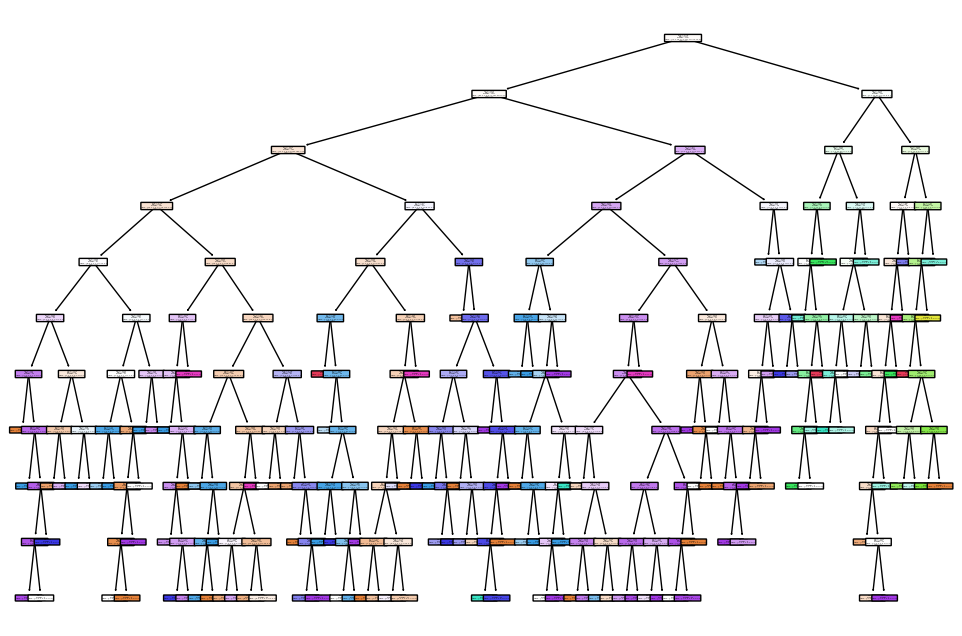

In [23]:
# Visualize the best tree if needed
plt.figure(figsize=(12, 8))
tree.plot_tree(best_model, filled=True, feature_names=X.columns, class_names=np.unique(y), rounded=True)
plt.show()